# Assignment 4

## Compare the result of any two image segmentation algorithm on the same image data set.

In [1]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving football_image.jpg to football_image (1).jpg


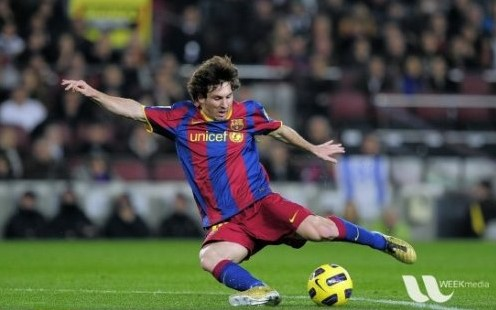

In [3]:
image_path = 'football_image.jpg'
image = cv2.imread(image_path) 
cv2_imshow(image)

## 1) Threshold based image segmentation:


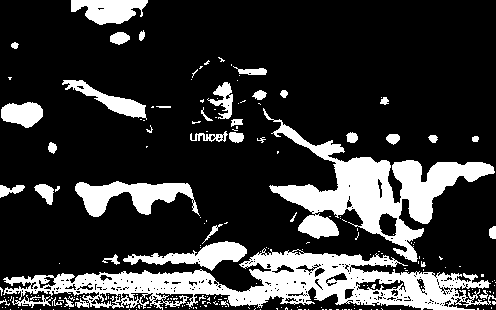

In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the threshold value 
threshold_value = 120

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

cv2_imshow(binary_image)

## 2) Watershed image segmentation:

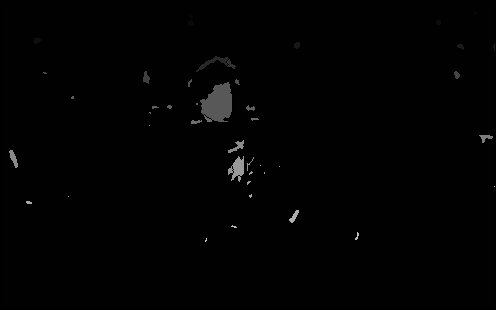

In [5]:
# Blur the image to reduce noise
gray = cv2.GaussianBlur(gray, (5,5), 0)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Create a kernel for the morphological operation 
kernel = np.ones((3,3), np.uint8)

# Perform morphological opening to remove small objects
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Create a mask for the background
background_mask = cv2.dilate(opening, kernel, iterations=3)

# Create a mask for the foreground
foreground_mask = cv2.subtract(binary_image, opening)

# Find the markers for the watershed transformation
_, markers = cv2.connectedComponents(foreground_mask)

# Add one to all labels so that the background is not 0, but 1 
markers += 1

# Set the background to 0 
markers[background_mask == 255] = 0

# Perform the watershed transformation 
segmentation = cv2.watershed(image, markers)

cv2_imshow(segmentation)
